In [78]:
import pandas as pd
import numpy as np
import os
import geopandas
from shapely.geometry import Polygon, Point
from shapely import wkt
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv("./Datasets/ReducedData/Activity_711.csv")

In [7]:
df['currentMode'].value_counts()

AtHome          4171
Transport       1539
AtWork           964
AtRestaurant     282
AtRecreation       7
Name: currentMode, dtype: int64

In [9]:
df['hungerStatus'].value_counts()

BecomingHungry    2146
JustAte           1829
Hungry            1438
BecameFull         920
Starving           630
Name: hungerStatus, dtype: int64

In [14]:
for col in df.columns:
    print()
    print(df[col].value_counts())


2023-01-02 16:40:00+00:00    1
2022-05-22 16:25:00+00:00    1
2022-06-08 08:20:00+00:00    1
2023-05-03 17:05:00+00:00    1
2023-01-27 16:35:00+00:00    1
                            ..
2022-11-09 08:15:00+00:00    1
2023-03-25 08:15:00+00:00    1
2022-12-02 03:35:00+00:00    1
2022-12-23 08:20:00+00:00    1
2023-04-26 16:25:00+00:00    1
Name: timestamp, Length: 6963, dtype: int64

711.0    6963
Name: participantId, dtype: int64

AtHome          4171
Transport       1539
AtWork           964
AtRestaurant     282
AtRecreation       7
Name: currentMode, dtype: int64

BecomingHungry    2146
JustAte           1829
Hungry            1438
BecameFull         920
Starving           630
Name: hungerStatus, dtype: int64

Awake             5161
Sleeping          1801
PrepareToSleep       1
Name: sleepStatus, dtype: int64

1246.0    6963
Name: apartmentId, dtype: int64

2163.638504     17
2045.578162     14
2143.263420     12
2021.019893     12
6215.190175     11
                ..
42360.670890 

In [15]:
df

,timestamp,participantId,currentMode,hungerStatus,sleepStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget,x,y
0,2022-03-01 00:00:00+00:00,711.0,AtHome,JustAte,Sleeping,1246.0,1920.242429,782.0,Stable,20.0,1124.659416,-681.259639,6023.524357
1,2022-03-01 00:05:00+00:00,711.0,AtHome,JustAte,Sleeping,1246.0,1920.242429,782.0,Stable,20.0,1124.659416,-681.259639,6023.524357
2,2022-03-01 00:50:00+00:00,711.0,AtHome,BecameFull,Sleeping,1246.0,1920.242429,782.0,Stable,20.0,1124.659416,-681.259639,6023.524357
3,2022-03-01 03:30:00+00:00,711.0,AtHome,BecomingHungry,Sleeping,1246.0,1920.242429,782.0,Stable,20.0,1124.659416,-681.259639,6023.524357
4,2022-03-01 08:05:00+00:00,711.0,AtHome,BecomingHungry,Awake,1246.0,1920.242429,782.0,Stable,20.0,1124.659416,-681.259639,6023.524357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,2023-05-23 23:25:00+00:00,711.0,AtHome,BecomingHungry,Sleeping,1246.0,49507.651032,782.0,Stable,20.0,38945.039367,-681.259639,6023.524357
6959,2023-05-24 00:00:00+00:00,711.0,AtHome,BecomingHungry,Sleeping,1246.0,49507.651032,782.0,Stable,20.0,43823.669288,-681.259639,6023.524357
6960,2023-05-24 00:50:00+00:00,711.0,AtHome,Hungry,Sleeping,1246.0,49507.651032,782.0,Stable,20.0,43823.669288,-681.259639,6023.524357
6961,2023-05-24 03:35:00+00:00,711.0,AtHome,Starving,Sleeping,1246.0,49507.651032,782.0,Stable,20.0,43823.669288,-681.259639,6023.524357


In [144]:
act_list = []
for offset in range(0, 1011):
    act_list.append(pd.read_csv(f"./Datasets/ReducedData/Activity_{offset}.csv"))
    if offset % 100 == 0:
        print("Processing", offset)
        
all_act_log = pd.concat(act_list,axis = 0 )
# all_act_log = all_act_log[['participantId', 'apartmentId']].drop_duplicates()



Processing 0
Processing 100
Processing 200
Processing 300
Processing 400
Processing 500
Processing 600
Processing 700
Processing 800
Processing 900
Processing 1000


In [145]:
all_act_log


,timestamp,participantId,currentMode,hungerStatus,sleepStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget,x,y
0,2022-03-01 00:00:00+00:00,0.0,AtHome,JustAte,Sleeping,926.0,1286.519556,254.0,Stable,12.0,1104.302570,-2724.627767,6866.208183
1,2022-03-01 00:05:00+00:00,0.0,AtHome,JustAte,Sleeping,926.0,1286.519556,254.0,Stable,12.0,1104.302570,-2724.627767,6866.208183
2,2022-03-01 00:50:00+00:00,0.0,AtHome,BecameFull,Sleeping,926.0,1286.519556,254.0,Stable,12.0,1104.302570,-2724.627767,6866.208183
3,2022-03-01 03:25:00+00:00,0.0,AtHome,BecomingHungry,Sleeping,926.0,1286.519556,254.0,Stable,12.0,1104.302570,-2724.627767,6866.208183
4,2022-03-01 06:10:00+00:00,0.0,AtHome,BecomingHungry,Awake,926.0,1286.519556,254.0,Stable,12.0,1104.302570,-2724.627767,6866.208183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20438,2023-05-23 19:50:00+00:00,1010.0,Transport,Hungry,Awake,597.0,13985.993981,143.0,Stable,12.0,2707.579785,-1978.873133,2860.280883
20439,2023-05-23 19:55:00+00:00,1010.0,AtHome,Starving,Awake,597.0,13985.993981,143.0,Stable,12.0,2707.579785,-2100.356964,2596.342803
20440,2023-05-23 22:15:00+00:00,1010.0,AtHome,Starving,Sleeping,597.0,13985.993981,143.0,Stable,12.0,2707.579785,-2100.356964,2596.342803
20441,2023-05-24 00:00:00+00:00,1010.0,AtHome,Starving,Sleeping,597.0,13985.993981,143.0,Stable,12.0,3063.350689,-2100.356964,2596.342803


In [146]:
all_act_log.to_csv("all_act_log.csv",index=False)

In [153]:
pid_jid = all_act_log[['participantId','jobId']].drop_duplicates().fillna(0)
pid_jid['participantId'] = pid_jid['participantId'].astype(int)
pid_jid['jobId'] = pid_jid['jobId'].astype(int)
pid_jid.to_csv("participant_job.csv")

In [5]:
apartment = pd.read_csv("./Datasets/Attributes/Apartments.csv")

In [6]:
all_act_log

,participantId,apartmentId
0,0.0,926.0
0,1.0,928.0
0,2.0,291.0
0,3.0,1243.0
0,4.0,194.0
...,...,...
0,1006.0,1633.0
0,1007.0,1620.0
0,1008.0,525.0
0,1009.0,663.0


In [8]:
apartment['location']

0        POINT (1077.6979444315298 648.4427163702453)
1       POINT (-185.9292838076562 1520.3270983045118)
2        POINT (2123.0141855392585 5126.753457243003)
3        POINT (2103.6301776944765 4266.932930123476)
4        POINT (7.0589743819342985 79.96163671849988)
                            ...                      
1512     POINT (-4097.077996668109 7409.520667070145)
1513     POINT (-4334.244917025952 7164.441147048659)
1514    POINT (-3330.5855567286076 7588.646019451729)
1515     POINT (-4151.807872263513 7409.520667070145)
1516     POINT (-4584.719945687293 4739.946539702664)
Name: location, Length: 1517, dtype: object

In [9]:
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)


In [104]:
apartment_map = geopandas.read_file("./Datasets/Attributes/Apartments.csv")
apartment_map['geometry'] = apartment_map['location'].apply(wkt.loads)

In [120]:
building

,buildingId,location,buildingType,maxOccupancy,units,geometry
0,1,"POLYGON ((350.0638997002585 4595.665606173783,...",Commercial,,,"POLYGON ((350.064 4595.666, 390.063 4595.892, ..."
1,2,POLYGON ((-1926.972613718425 2725.610686806701...,Residental,12,"[481,498,534,652,818]","POLYGON ((-1926.973 2725.611, -1948.191 2730.2..."
2,3,"POLYGON ((685.6846002015491 1552.131491805318,...",Commercial,,[382],"POLYGON ((685.685 1552.131, 645.998 1547.130, ..."
3,4,"POLYGON ((-976.7845160060303 4542.38209636188,...",Commercial,,,"POLYGON ((-976.785 4542.382, -1053.288 4531.35..."
4,5,POLYGON ((1259.3061988755617 3572.726728111263...,Residental,2,[231],"POLYGON ((1259.306 3572.727, 1299.255 3574.747..."
...,...,...,...,...,...,...
1037,1038,POLYGON ((361.2332515102781 4376.8840047388585...,Residental,8,"[118,287]","POLYGON ((361.233 4376.884, 390.521 4376.722, ..."
1038,1039,POLYGON ((1011.5463728925471 362.9701764035531...,Residental,2,[365],"POLYGON ((1011.546 362.970, 1011.169 322.972, ..."
1039,1040,POLYGON ((-3562.8074734172264 7362.92295511692...,Residental,5,"[1406,1564,1569]","POLYGON ((-3562.807 7362.923, -3557.337 7294.1..."
1040,1041,POLYGON ((-4151.699758553839 5418.613349758049...,Commercial,,[1737],"POLYGON ((-4151.700 5418.613, -4116.226 5419.1..."


In [103]:
building = geopandas.read_file("./Datasets/Attributes/Buildings.csv")
building['geometry'] = building['location'].apply(wkt.loads)

<AxesSubplot:>

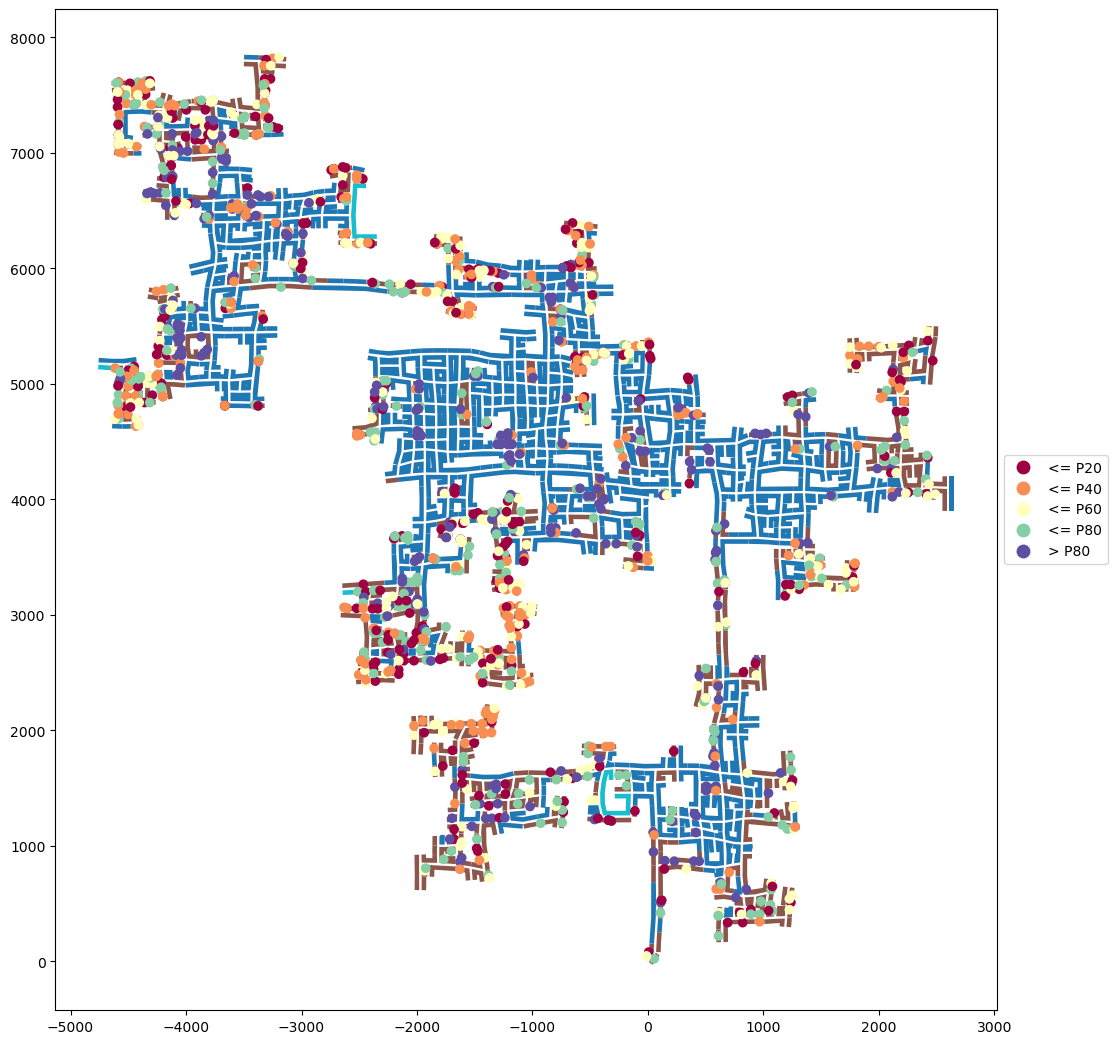

In [141]:
fig, ax = plt.subplots(figsize=(13, 13))

building.plot(ax=ax, categorical=True, column='buildingType', legend=True)
apartment_map.plot(
    ax=ax, 
    categorical=True, 
    column='RentalCostCategory', 
    cmap='Spectral', 
    legend=True, 
    legend_kwds={
        'loc': 'center left', 
        'bbox_to_anchor':(1,0.5),
        'fmt': "{:.0f}"
    }
)

# gdf.plot(column='class', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
#          legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False}, ax=ax)


In [102]:
apartment


,apartmentId,rentalCost,maxOccupancy,numberOfRooms,location,buildingId,RentalCost Category,RentalCostCategory
0,1,768.16,2,4,POINT (1077.6979444315298 648.4427163702453),340,<= P50,<= P50
1,2,1014.55,2,1,POINT (-185.9292838076562 1520.3270983045118),752,> P75,> P75
2,3,1057.39,4,3,POINT (2123.0141855392585 5126.753457243003),639,> P75,> P75
3,4,1259.10,4,3,POINT (2103.6301776944765 4266.932930123476),397,> P75,> P75
4,5,411.50,1,4,POINT (7.0589743819342985 79.96163671849988),628,<= P25,<= P25
...,...,...,...,...,...,...,...,...
1512,1729,703.80,2,4,POINT (-4097.077996668109 7409.520667070145),182,<= P50,<= P50
1513,1730,1104.62,4,2,POINT (-4334.244917025952 7164.441147048659),613,> P75,> P75
1514,1731,890.69,4,1,POINT (-3330.5855567286076 7588.646019451729),513,<= P75,<= P75
1515,1732,703.80,2,3,POINT (-4151.807872263513 7409.520667070145),182,<= P50,<= P50


In [45]:
from matplotlib import pyplot as plt

In [140]:
def rental_cost_encode(col):
    col_stat = col.describe()['rentalCost']
    col.loc[col['rentalCost'] > np.percentile(col['rentalCost'], 80), 'RentalCost Category'] = '> P80'
    col.loc[col['rentalCost'] <= np.percentile(col['rentalCost'], 80), 'RentalCost Category'] = '<= P80'    
    col.loc[col['rentalCost'] <= np.percentile(col['rentalCost'], 60), 'RentalCost Category'] = '<= P60'
    col.loc[col['rentalCost'] <= np.percentile(col['rentalCost'], 40), 'RentalCost Category'] = '<= P40'
    col.loc[col['rentalCost'] <= np.percentile(col['rentalCost'], 20), 'RentalCost Category'] = '<= P20'
    return col['RentalCost Category']

In [138]:
# apartment_map['rentalCost'] = apartment_map['rentalCost'].astype(float)
apartment_map['RentalCostCategory'] = rental_cost_encode(apartment_map[['rentalCost']])
# apartment

C:\Users\TANGGA\AppData\Local\Temp\ipykernel_29076\747819671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.loc[col['rentalCost'] > np.percentile(col['rentalCost'], 80), 'RentalCost Category'] = '> P80'


Text(0, 0.5, 'Count')

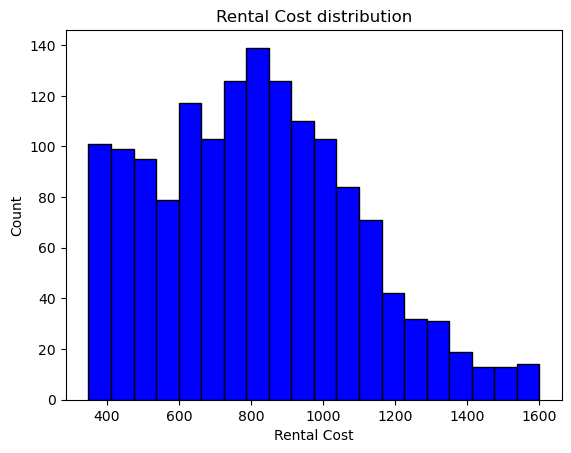

In [60]:
import matplotlib.pyplot as plt

# matplotlib histogram
plt.hist(apartment['rentalCost'], color = 'blue', edgecolor = 'black',bins = 20)

# Add labels
plt.title('Rental Cost distribution')
plt.xlabel('Rental Cost')
plt.ylabel('Count')

In [106]:
rent_stat = apartment_map.describe()['rentalCost']

804.37

0        768.16
1       1014.55
2       1057.39
3       1259.10
4        411.50
         ...   
1512     703.80
1513    1104.62
1514     890.69
1515     703.80
1516     607.99
Name: rentalCost, Length: 1517, dtype: float64